# Data Wrangling with Pandas

Now that we have been exposed to the basic functionality of Pandas, lets explore some more advanced features that will be useful when addressing more complex data management tasks.

As most statisticians/data analysts will admit, often the lion's share of the time spent implementing an analysis is devoted to preparing the data itself, rather than to coding or running a particular model that uses the data. This is where Pandas and  Python's standard library are beneficial, providing high-level, flexible, and efficient tools for manipulating your data as needed.


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')

## Date/Time data handling

Date and time data are inherently problematic. There are an unequal number of days in every month, an unequal number of days in a year (due to leap years), and time zones that vary over space. Yet information about time is essential in many analyses, particularly in the case of time series analysis.

The `datetime` built-in library handles temporal information down to the nanosecond.

In [2]:
from datetime import datetime

In [3]:
now = datetime.now()
now

datetime.datetime(2018, 12, 19, 3, 19, 9, 608592)

In [4]:
now.day

19

In [5]:
now.weekday()

2

In addition to `datetime` there are simpler objects for date and time information only, respectively.

In [6]:
from datetime import date, time

In [7]:
time(3, 24)

datetime.time(3, 24)

In [8]:
date(1970, 9, 3)

datetime.date(1970, 9, 3)

Having a custom data type for dates and times is convenient because we can perform operations on them easily. For example, we may want to calculate the difference between two times:

In [9]:
my_age = now - datetime(1970, 9, 3)
my_age

datetime.timedelta(17639, 11949, 608592)

In [10]:
my_age.days/365.

48.326027397260276

In this section, we will manipulate data collected from ocean-going vessels on the eastern seaboard. Vessel operations are monitored using the Automatic Identification System (AIS), a safety at sea navigation technology which vessels are required to maintain and that uses transponders to transmit very high frequency (VHF) radio signals containing static information including ship name, call sign, and country of origin, as well as dynamic information unique to a particular voyage such as vessel location, heading, and speed. 

The International Maritime Organization’s (IMO) International Convention for the Safety of Life at Sea requires functioning AIS capabilities on all vessels 300 gross tons or greater and the US Coast Guard requires AIS on nearly all vessels sailing in U.S. waters. The Coast Guard has established a national network of AIS receivers that provides coverage of nearly all U.S. waters. AIS signals are transmitted several times each minute and the network is capable of handling thousands of reports per minute and updates as often as every two seconds. Therefore, a typical voyage in our study might include the transmission of hundreds or thousands of AIS encoded signals. This provides a rich source of spatial data that includes both spatial and temporal information.

For our purposes, we will use summarized data that describes the transit of a given vessel through a particular administrative area. The data includes the start and end time of the transit segment, as well as information about the speed of the vessel, how far it travelled, etc.

In [11]:
segments = pd.read_csv("../data/AIS/transit_segments.csv")
segments.head()

,mmsi,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
0,1,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2/10/09 16:03,2/10/09 16:27
1,1,Dredge Capt Frank,1,1,13.5,18.6,10.4,20.6,100.0,4/6/09 14:31,4/6/09 15:20
2,1,Us Gov Vessel,1,1,4.3,16.2,10.3,20.5,100.0,4/6/09 14:36,4/6/09 14:55
3,1,Us Gov Vessel,2,1,9.2,15.4,14.5,16.1,100.0,4/10/09 17:58,4/10/09 18:34
4,1,Dredge Capt Frank,2,1,9.2,15.4,14.6,16.2,100.0,4/10/09 17:59,4/10/09 18:35


For example, we might be interested in the distribution of transit lengths, so we can plot them as a histogram:

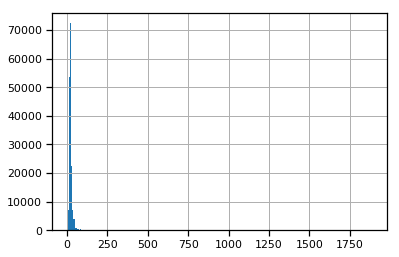

In [12]:
segments.seg_length.hist(bins=500)

Though most of the transits appear to be short, there are a few longer distances that make the plot difficult to read. This is where a transformation is useful:

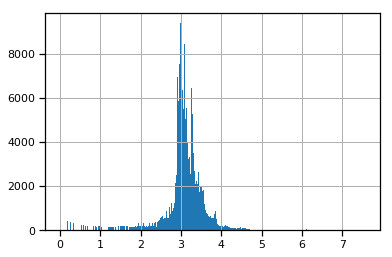

In [13]:
segments.seg_length.apply(np.log).hist(bins=500)

We can see that although there are date/time fields in the dataset, they are not in any specialized format, such as `datetime`.

In [14]:
segments.st_time.dtype

dtype('O')

Our first order of business will be to convert these data to `datetime`. The `strptime` method parses a string representation of a date and/or time field, according to the expected format of this information.

In [15]:
datetime.strptime(segments.st_time.loc[0], '%m/%d/%y %H:%M')

datetime.datetime(2009, 2, 10, 16, 3)

The `dateutil` package includes a parser that attempts to detect the format of the date strings, and convert them automatically.

In [16]:
from dateutil.parser import parse

In [17]:
parse(segments.st_time.loc[0])

datetime.datetime(2009, 2, 10, 16, 3)

We can convert all the dates in a particular column by using the `apply` method.

In [18]:
segments.st_time.apply(lambda d: datetime.strptime(d, '%m/%d/%y %H:%M'))

0        2009-02-10 16:03:00
1        2009-04-06 14:31:00
2        2009-04-06 14:36:00
3        2009-04-10 17:58:00
4        2009-04-10 17:59:00
5        2010-03-20 16:06:00
6        2010-03-20 18:05:00
7        2011-05-04 11:28:00
8        2010-06-05 11:23:00
9        2010-06-08 11:03:00
10       2010-06-14 17:07:00
11       2010-06-17 16:35:00
12       2010-07-11 11:51:00
13       2010-07-12 15:33:00
14       2010-07-20 19:23:00
15       2010-09-10 14:00:00
16       2011-03-14 16:13:00
17       2011-03-18 11:18:00
18       2011-04-25 16:37:00
19       2011-05-14 15:51:00
20       2011-05-19 12:34:00
21       2011-05-23 21:29:00
22       2011-05-25 11:46:00
23       2011-06-01 14:32:00
24       2011-06-07 14:43:00
25       2011-08-08 15:42:00
26       2011-09-06 20:59:00
27       2011-09-08 08:22:00
28       2011-09-12 14:56:00
29       2011-10-25 12:52:00
                 ...        
262496   2009-11-22 02:13:00
262497   2009-11-22 02:15:00
262498   2009-12-02 01:46:00
262499   2009-

As a convenience, Pandas has a `to_datetime` method that will parse and convert an entire Series of formatted strings into `datetime` objects.

In [19]:
pd.to_datetime(segments.st_time[:10])

0   2009-02-10 16:03:00
1   2009-04-06 14:31:00
2   2009-04-06 14:36:00
3   2009-04-10 17:58:00
4   2009-04-10 17:59:00
5   2010-03-20 16:06:00
6   2010-03-20 18:05:00
7   2011-05-04 11:28:00
8   2010-06-05 11:23:00
9   2010-06-08 11:03:00
Name: st_time, dtype: datetime64[ns]

Pandas also has a custom NA value for missing datetime objects, `NaT`.

In [20]:
pd.to_datetime([None])

DatetimeIndex(['NaT'], dtype='datetime64[ns]', freq=None)

Also, if `to_datetime()` has problems parsing any particular date/time format, you can pass the spec in using the `format=` argument.

The `read_*` functions now have an optional `parse_dates` argument that try to convert any columns passed to it into `datetime` format upon import:

In [21]:
segments = pd.read_csv("../data/AIS/transit_segments.csv", parse_dates=['st_time', 'end_time'])

In [22]:
segments.dtypes

mmsi                   int64
name                  object
transit                int64
segment                int64
seg_length           float64
avg_sog              float64
min_sog              float64
max_sog              float64
pdgt10               float64
st_time       datetime64[ns]
end_time      datetime64[ns]
dtype: object

Columns of the `datetime` type have an **accessor** to easily extract properties of the data type. This will return a `Series`, with the same row index as the `DataFrame`. For example:

In [23]:
segments.st_time.dt.month.head()

0    2
1    4
2    4
3    4
4    4
Name: st_time, dtype: int64

In [24]:
segments.st_time.dt.hour.head()

0    16
1    14
2    14
3    17
4    17
Name: st_time, dtype: int64

This can be used to easily filter rows by particular temporal attributes:

In [25]:
segments[segments.st_time.dt.month==2].head()

,mmsi,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
0,1,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2009-02-10 16:03:00,2009-02-10 16:27:00
78,3011,Charleston,16,1,18.9,0.3,0.0,16.1,0.5,2010-02-07 07:26:00,2010-02-09 19:27:00
79,3011,Charleston,17,1,19.2,0.3,0.0,6.4,0.0,2010-02-11 16:56:00,2010-02-14 14:31:00
80,3011,Charleston,18,1,24.7,0.3,0.0,5.7,0.0,2010-02-19 11:53:00,2010-02-22 16:50:00
81,3011,Charleston,19,1,40.1,0.4,0.0,16.3,0.1,2010-02-23 15:15:00,2010-03-02 14:25:00


In addition, time zone information can be applied:

In [26]:
segments.st_time.dt.tz_localize('UTC').head()

0   2009-02-10 16:03:00+00:00
1   2009-04-06 14:31:00+00:00
2   2009-04-06 14:36:00+00:00
3   2009-04-10 17:58:00+00:00
4   2009-04-10 17:59:00+00:00
Name: st_time, dtype: datetime64[ns, UTC]

In [27]:
segments.st_time.dt.tz_localize('UTC').dt.tz_convert('US/Eastern').head()

0   2009-02-10 11:03:00-05:00
1   2009-04-06 10:31:00-04:00
2   2009-04-06 10:36:00-04:00
3   2009-04-10 13:58:00-04:00
4   2009-04-10 13:59:00-04:00
Name: st_time, dtype: datetime64[ns, US/Eastern]

### Composing DateTime columns

Often data will include temporal information that is not expressed as a date or time. For example, the year, month, day, hour, etc. will occupy their own columns. These can be composed into a `datetime64` column using`to_datetime`.

Let's simulate some temperature data to see how this works:

In [28]:
from itertools import product

years = range(2000, 2018)
months = range(1, 13)
days = range(1, 29)
hours = range(24)

temp_df = pd.DataFrame(list(product(years, months, days, hours)), 
                         columns=['year', 'month', 'day', 'hour'])

dtemp = np.random.normal(size=temp_df.shape[0])
temp_df['temperature'] = 75 + dtemp

In [29]:
temp_df.head()

,year,month,day,hour,temperature
0,2000,1,1,0,77.327416
1,2000,1,1,1,74.360109
2,2000,1,1,2,75.300328
3,2000,1,1,3,72.885373
4,2000,1,1,4,75.828320


In [30]:
temp_df.index = pd.to_datetime(temp_df[['year', 'month', 'day', 'hour']])
temp_df.head()

,year,month,day,hour,temperature
2000-01-01 00:00:00,2000,1,1,0,77.327416
2000-01-01 01:00:00,2000,1,1,1,74.360109
2000-01-01 02:00:00,2000,1,1,2,75.300328
2000-01-01 03:00:00,2000,1,1,3,72.885373
2000-01-01 04:00:00,2000,1,1,4,75.828320


In [31]:
temp_df.index

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:00:00',
               '2000-01-01 02:00:00', '2000-01-01 03:00:00',
               '2000-01-01 04:00:00', '2000-01-01 05:00:00',
               '2000-01-01 06:00:00', '2000-01-01 07:00:00',
               '2000-01-01 08:00:00', '2000-01-01 09:00:00',
               ...
               '2017-12-28 14:00:00', '2017-12-28 15:00:00',
               '2017-12-28 16:00:00', '2017-12-28 17:00:00',
               '2017-12-28 18:00:00', '2017-12-28 19:00:00',
               '2017-12-28 20:00:00', '2017-12-28 21:00:00',
               '2017-12-28 22:00:00', '2017-12-28 23:00:00'],
              dtype='datetime64[ns]', length=145152, freq=None)

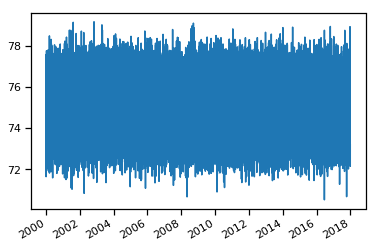

In [32]:
temp_df.temperature.plot()

## Merging and joining DataFrame objects

Now that we have the vessel transit information as we need it, we may want a little more information regarding the vessels themselves. In the `data/AIS` folder there is a second table that contains information about each of the ships that traveled the segments in the `segments` table.

In [33]:
vessels = pd.read_csv("../data/AIS/vessel_information.csv", index_col='mmsi')
vessels.head()

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type
mmsi,,,,,,,,,,
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing
9,3,000000009/Raven/Shearwater,N,Unknown,Unknown,2,50.0/62.0,62.0,2,Pleasure/Tug
21,1,Us Gov Vessel,Y,Unknown,Unknown,1,208.0,208.0,1,Unknown
74,2,Mcfaul/Sarah Bell,N,Unknown,Unknown,1,155.0,155.0,1,Unknown
103,3,Ron G/Us Navy Warship 103/Us Warship 103,Y,Unknown,Unknown,2,26.0/155.0,155.0,2,Tanker/Unknown


In [34]:
[v for v in vessels.type.unique() if v.find('/')==-1]

['Unknown',
 'Other',
 'Tug',
 'Towing',
 'Pleasure',
 'Cargo',
 'WIG',
 'Fishing',
 'BigTow',
 'MilOps',
 'Tanker',
 'Passenger',
 'SAR',
 'Sailing',
 'Reserved',
 'Law',
 'Dredging',
 'AntiPol',
 'Pilot',
 'HSC',
 'Diving',
 'Resol-18',
 'Tender',
 'Spare',
 'Medical']

In [35]:
vessels.type.value_counts()

Cargo                                                                                5622
Tanker                                                                               2440
Pleasure                                                                              601
Tug                                                                                   221
Sailing                                                                               205
Fishing                                                                               200
Other                                                                                 178
Passenger                                                                             150
Towing                                                                                117
Unknown                                                                               106
MilOps                                                                                 82
Cargo/Unkn

The challenge, however, is that several ships have travelled multiple segments, so there is not a one-to-one relationship between the rows of the two tables. The table of vessel information has a *one-to-many* relationship with the segments.

In Pandas, we can combine tables according to the value of one or more *keys* that are used to identify rows, much like an index. Using a trivial example:

In [36]:
df1 = pd.DataFrame(dict(id=range(4), age=np.random.randint(18, 31, size=4)))
df2 = pd.DataFrame(dict(id=list(range(3))+list(range(3)), 
                        score=np.random.random(size=6)))

df1

,id,age
0,0,29
1,1,19
2,2,28
3,3,29


In [37]:
df2

,id,score
0,0,0.265771
1,1,0.013181
2,2,0.737996
3,0,0.440042
4,1,0.390013
5,2,0.424213


In [38]:
pd.merge(df1, df2)

,id,age,score
0,0,29,0.265771
1,0,29,0.440042
2,1,19,0.013181
3,1,19,0.390013
4,2,28,0.737996
5,2,28,0.424213


Notice that without any information about which column to use as a key, Pandas did the right thing and used the `id` column in both tables. Unless specified otherwise, `merge` will used any common column names as keys for merging the tables. 

Notice also that `id=3` from `df1` was omitted from the merged table. This is because, by default, `merge` performs an **inner join** on the tables, meaning that the merged table represents an intersection of the two tables.

In [39]:
pd.merge(df1, df2, how='outer')

,id,age,score
0,0,29,0.265771
1,0,29,0.440042
2,1,19,0.013181
3,1,19,0.390013
4,2,28,0.737996
5,2,28,0.424213
6,3,29,NaN


The **outer join** above yields the union of the two tables, so all rows are represented, with missing values inserted as appropriate. One can also perform **right** and **left** joins to include all rows of the right or left table (*i.e.* first or second argument to `merge`), but not necessarily the other.

Looking at the two datasets that we wish to merge:

In [40]:
segments.head(1)

,mmsi,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
0,1,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2009-02-10 16:03:00,2009-02-10 16:27:00


In [41]:
vessels.head(1)

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type
mmsi,,,,,,,,,,
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing


we see that there is a `mmsi` value (a vessel identifier) in each table, but it is used as an index for the `vessels` table. In this case, we have to specify to join on the index for this table, and on the `mmsi` column for the other.

In [42]:
segments_merged = pd.merge(vessels, segments, left_index=True, right_on='mmsi')

In [43]:
segments_merged.head()

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type,...,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
0,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2009-02-10 16:03:00,2009-02-10 16:27:00
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Dredge Capt Frank,1,1,13.5,18.6,10.4,20.6,100.0,2009-04-06 14:31:00,2009-04-06 15:20:00
2,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Us Gov Vessel,1,1,4.3,16.2,10.3,20.5,100.0,2009-04-06 14:36:00,2009-04-06 14:55:00
3,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Us Gov Vessel,2,1,9.2,15.4,14.5,16.1,100.0,2009-04-10 17:58:00,2009-04-10 18:34:00
4,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Dredge Capt Frank,2,1,9.2,15.4,14.6,16.2,100.0,2009-04-10 17:59:00,2009-04-10 18:35:00


In this case, the default inner join is suitable; we are not interested in observations from either table that do not have corresponding entries in the other. 

Notice that `mmsi` field that was an index on the `vessels` table is no longer an index on the merged table.

Here, we used the `merge` function to perform the merge; we could also have used the `merge` *method* for either of the tables:

In [44]:
vessels.merge(segments, left_index=True, right_on='mmsi').head()

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type,...,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
0,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2009-02-10 16:03:00,2009-02-10 16:27:00
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Dredge Capt Frank,1,1,13.5,18.6,10.4,20.6,100.0,2009-04-06 14:31:00,2009-04-06 15:20:00
2,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Us Gov Vessel,1,1,4.3,16.2,10.3,20.5,100.0,2009-04-06 14:36:00,2009-04-06 14:55:00
3,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Us Gov Vessel,2,1,9.2,15.4,14.5,16.1,100.0,2009-04-10 17:58:00,2009-04-10 18:34:00
4,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Dredge Capt Frank,2,1,9.2,15.4,14.6,16.2,100.0,2009-04-10 17:59:00,2009-04-10 18:35:00


Occasionally, there will be fields with the same in both tables that we do not wish to use to join the tables; they may contain different information, despite having the same name. In this case, Pandas will by default append suffixes `_x` and `_y` to the columns to uniquely identify them.

In [45]:
segments['type'] = 'foo'
pd.merge(vessels, segments, left_index=True, right_on='mmsi').head()

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type_x,...,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time,type_y
0,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,1,1,5.1,13.2,9.2,14.5,96.5,2009-02-10 16:03:00,2009-02-10 16:27:00,foo
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,1,1,13.5,18.6,10.4,20.6,100.0,2009-04-06 14:31:00,2009-04-06 15:20:00,foo
2,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,1,1,4.3,16.2,10.3,20.5,100.0,2009-04-06 14:36:00,2009-04-06 14:55:00,foo
3,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,2,1,9.2,15.4,14.5,16.1,100.0,2009-04-10 17:58:00,2009-04-10 18:34:00,foo
4,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,2,1,9.2,15.4,14.6,16.2,100.0,2009-04-10 17:59:00,2009-04-10 18:35:00,foo


This behavior can be overridden by specifying a `suffixes` argument, containing a list of the suffixes to be used for the columns of the left and right columns, respectively.

## Concatenation

A common data manipulation is appending rows or columns to a dataset that already conform to the dimensions of the exsiting rows or colums, respectively. In NumPy, this is done either with `concatenate` or the convenience "functions" `c_` and `r_`:

In [46]:
np.concatenate([np.random.random(5), np.random.random(5)])

array([0.90954206, 0.61534956, 0.2086409 , 0.81503793, 0.1884048 ,
       0.66925574, 0.72293834, 0.27953444, 0.06245282, 0.10550863])

In [47]:
np.r_[np.random.random(5), np.random.random(5)]

array([0.50499284, 0.03274912, 0.62753374, 0.83387435, 0.64792836,
       0.36387018, 0.10070664, 0.36856772, 0.40461254, 0.42920966])

In [48]:
np.c_[np.random.random(5), np.random.random(5)]

array([[0.95709026, 0.56184021],
       [0.38394114, 0.35553651],
       [0.17168645, 0.71328416],
       [0.32543756, 0.0937712 ],
       [0.56251053, 0.45562755]])

> Notice that `c_` and `r_` are not really functions at all, since it is performing some sort of indexing operation, rather than being called. They are actually *class instances*, but they are here behaving mostly like functions. Don't think about this too hard; just know that they are there.

This operation is also called *binding* or *stacking*.

With Pandas' indexed data structures, there are additional considerations as the overlap in index values between two data structures affects how they are concatenate.

Lets import two microbiome datasets, each consisting of counts of microorganiams from a particular patient. We will use the first column of each dataset as the index.

In [49]:
mb1 = pd.read_excel('../data/microbiome/MID1.xls', 'Sheet 1', index_col=0, header=None)
mb2 = pd.read_excel('../data/microbiome/MID2.xls', 'Sheet 1', index_col=0, header=None)
mb1.shape, mb2.shape

((272, 1), (288, 1))

In [50]:
mb1.head()

,1
0,
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus",2
"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus",3
"Archaea ""Crenarchaeota"" Thermoprotei Thermoproteales Thermofilaceae Thermofilum",3
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanocellales Methanocellaceae Methanocella",7


Let's give the index and columns meaningful labels:

In [51]:
mb1.columns = mb2.columns = ['Count']

In [52]:
mb1.index.name = mb2.index.name = 'Taxon'

In [53]:
mb1.head()

,Count
Taxon,
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus",2
"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus",3
"Archaea ""Crenarchaeota"" Thermoprotei Thermoproteales Thermofilaceae Thermofilum",3
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanocellales Methanocellaceae Methanocella",7


The index of these data is the unique biological classification of each organism, beginning with *domain*, *phylum*, *class*, and for some organisms, going all the way down to the genus level.

![classification](http://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Biological_classification_L_Pengo_vflip.svg/150px-Biological_classification_L_Pengo_vflip.svg.png)

In [54]:
mb1.index[:3]

Index(['Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera',
       'Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus',
       'Archaea "Crenarchaeota" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus'],
      dtype='object', name='Taxon')

In [55]:
mb1.index.is_unique

True

If we concatenate along `axis=0` (the default), we will obtain another data frame with the the rows concatenated:

In [56]:
pd.concat([mb1, mb2], axis=0).shape

(560, 1)

However, the index is no longer unique, due to overlap between the two DataFrames.

In [57]:
pd.concat([mb1, mb2], axis=0).index.is_unique

False

Concatenating along `axis=1` will concatenate column-wise, but respecting the indices of the two DataFrames.

In [58]:
pd.concat([mb1, mb2], axis=1).shape

/home/fonnesbeck/anaconda3/envs/dev/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(438, 2)

In [59]:
pd.concat([mb1, mb2], axis=1).head()

/home/fonnesbeck/anaconda3/envs/dev/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Count,Count
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Acidilobaceae Acidilobus",NaN,2.0
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Caldisphaeraceae Caldisphaera",NaN,14.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7.0,23.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Sulfophobococcus",NaN,1.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Thermosphaera",NaN,2.0


If we are only interested in taxa that are included in both DataFrames, we can specify a `join=inner` argument.

In [60]:
pd.concat([mb1, mb2], axis=1, join='inner').head()

,Count,Count
Taxon,,
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7,23
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus",2,2
"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus",3,10
"Archaea ""Crenarchaeota"" Thermoprotei Thermoproteales Thermofilaceae Thermofilum",3,9
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanocellales Methanocellaceae Methanocella",7,9


If we wanted to use the second table to *fill values* absent from the first table, we could use `combine_first`.

In [61]:
mb1.combine_first(mb2).head()

,Count
Taxon,
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Acidilobaceae Acidilobus",2.0
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Caldisphaeraceae Caldisphaera",14.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Sulfophobococcus",1.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Thermosphaera",2.0


We can also create a hierarchical index based on keys identifying the original tables.

In [62]:
pd.concat([mb1, mb2], keys=['patient1', 'patient2']).head()

Count
         Taxon                                                    
patient1 Archaea "Crenarchaeota" Thermoprotei Desulfuroc...      7
         Archaea "Crenarchaeota" Thermoprotei Desulfuroc...      2
         Archaea "Crenarchaeota" Thermoprotei Sulfolobal...      3
         Archaea "Crenarchaeota" Thermoprotei Thermoprot...      3
         Archaea "Euryarchaeota" "Methanomicrobia" Metha...      7

In [63]:
pd.concat([mb1, mb2], keys=['patient1', 'patient2']).index.is_unique

True

Alternatively, you can pass keys to the concatenation by supplying the DataFrames (or Series) as a dict, resulting in a "wide" format table.

In [64]:
pd.concat(dict(patient1=mb1, patient2=mb2), axis=1).head()

/home/fonnesbeck/anaconda3/envs/dev/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,patient1,patient2
,Count,Count
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Acidilobaceae Acidilobus",NaN,2.0
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Caldisphaeraceae Caldisphaera",NaN,14.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7.0,23.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Sulfophobococcus",NaN,1.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Thermosphaera",NaN,2.0


If you want `concat` to work like `numpy.concatanate`, you may provide the `ignore_index=True` argument.

## Exercise

In the *data/microbiome* subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10th file that describes the content of each. Write code that imports each of the data spreadsheets and combines them into a single `DataFrame`, adding the identifying information from the metadata spreadsheet as columns in the combined `DataFrame`.

In [65]:
# Write solution here

## Reshaping DataFrame objects

In the context of a single DataFrame, we are often interested in re-arranging the layout of our data. 

This dataset is from Table 6.9 of [Statistical Methods for the Analysis of Repeated Measurements](http://www.amazon.com/Statistical-Methods-Analysis-Repeated-Measurements/dp/0387953701) by Charles S. Davis, pp. 161-163 (Springer, 2002). These data are from a multicenter, randomized controlled trial of botulinum toxin type B (BotB) in patients with cervical dystonia from nine U.S. sites.

* Randomized to placebo (N=36), 5000 units of BotB (N=36), 10,000 units of BotB (N=37)
* Response variable: total score on Toronto Western Spasmodic Torticollis Rating Scale (TWSTRS), measuring severity, pain, and disability of cervical dystonia (high scores mean more impairment)
* TWSTRS measured at baseline (week 0) and weeks 2, 4, 8, 12, 16 after treatment began

In [66]:
cdystonia = pd.read_csv("../data/cdystonia.csv", index_col=None)
cdystonia.head()

,patient,obs,week,site,id,treat,age,sex,twstrs
0,1,1,0,1,1,5000U,65,F,32
1,1,2,2,1,1,5000U,65,F,30
2,1,3,4,1,1,5000U,65,F,24
3,1,4,8,1,1,5000U,65,F,37
4,1,5,12,1,1,5000U,65,F,39


This dataset includes repeated measurements of the same individuals (longitudinal data). Its possible to present such information in (at least) two ways: showing each repeated measurement in their own row, or in multiple columns representing multiple measurements.


The `stack` method rotates the data frame so that columns are represented in rows:

In [67]:
stacked = cdystonia.stack()
stacked

0    patient        1
     obs            1
     week           0
     site           1
     id             1
     treat      5000U
     age           65
     sex            F
     twstrs        32
1    patient        1
     obs            2
     week           2
     site           1
     id             1
     treat      5000U
     age           65
     sex            F
     twstrs        30
2    patient        1
     obs            3
     week           4
     site           1
     id             1
     treat      5000U
     age           65
     sex            F
     twstrs        24
3    patient        1
     obs            4
     week           8
                ...  
627  age           57
     sex            M
     twstrs        38
628  patient      109
     obs            4
     week           8
     site           9
     id            11
     treat      5000U
     age           57
     sex            M
     twstrs        33
629  patient      109
     obs            5
     week 

To complement this, `unstack` pivots from rows back to columns.

In [68]:
stacked.unstack().head()

,patient,obs,week,site,id,treat,age,sex,twstrs
0,1,1,0,1,1,5000U,65,F,32
1,1,2,2,1,1,5000U,65,F,30
2,1,3,4,1,1,5000U,65,F,24
3,1,4,8,1,1,5000U,65,F,37
4,1,5,12,1,1,5000U,65,F,39


For this dataset, it makes sense to create a hierarchical index based on the patient and observation:

In [69]:
cdystonia2 = cdystonia.set_index(['patient','obs'])
cdystonia2.head()

week  site  id  treat  age sex  twstrs
patient obs                                        
1       1       0     1   1  5000U   65   F      32
        2       2     1   1  5000U   65   F      30
        3       4     1   1  5000U   65   F      24
        4       8     1   1  5000U   65   F      37
        5      12     1   1  5000U   65   F      39

In [70]:
cdystonia2.index.is_unique

True

If we want to transform this data so that repeated measurements are in columns, we can `unstack` the `twstrs` measurements according to `obs`.

In [71]:
twstrs_wide = cdystonia2['twstrs'].unstack('obs')
twstrs_wide.head()

obs,1,2,3,4,5,6
patient,,,,,,
1,32.0,30.0,24.0,37.0,39.0,36.0
2,60.0,26.0,27.0,41.0,65.0,67.0
3,44.0,20.0,23.0,26.0,35.0,35.0
4,53.0,61.0,64.0,62.0,NaN,NaN
5,53.0,35.0,48.0,49.0,41.0,51.0


In [72]:
cdystonia_wide = (cdystonia[['patient','site','id','treat','age','sex']]
                  .drop_duplicates()
                  .merge(twstrs_wide, right_index=True, left_on='patient', how='inner')
                  .head())
cdystonia_wide

,patient,site,id,treat,age,sex,1,2,3,4,5,6
0,1,1,1,5000U,65,F,32.0,30.0,24.0,37.0,39.0,36.0
6,2,1,2,10000U,70,F,60.0,26.0,27.0,41.0,65.0,67.0
12,3,1,3,5000U,64,F,44.0,20.0,23.0,26.0,35.0,35.0
18,4,1,4,Placebo,59,F,53.0,61.0,64.0,62.0,NaN,NaN
22,5,1,5,10000U,76,F,53.0,35.0,48.0,49.0,41.0,51.0


A slightly cleaner way of doing this is to set the patient-level information as an index before unstacking:

In [73]:
(cdystonia.set_index(['patient','site','id','treat','age','sex','week'])['twstrs']
     .unstack('week').head())

,,,,,week,0,2,4,8,12,16
patient,site,id,treat,age,sex,,,,,,
1,1,1,5000U,65,F,32.0,30.0,24.0,37.0,39.0,36.0
2,1,2,10000U,70,F,60.0,26.0,27.0,41.0,65.0,67.0
3,1,3,5000U,64,F,44.0,20.0,23.0,26.0,35.0,35.0
4,1,4,Placebo,59,F,53.0,61.0,64.0,62.0,NaN,NaN
5,1,5,10000U,76,F,53.0,35.0,48.0,49.0,41.0,51.0


To convert our "wide" format back to long, we can use the `melt` function, appropriately parameterized. This function is useful for `DataFrame`s where one
or more columns are identifier variables (`id_vars`), with the remaining columns being measured variables (`value_vars`). The measured variables are "unpivoted" to
the row axis, leaving just two non-identifier columns, a *variable* and its corresponding *value*, which can both be renamed using optional arguments.

In [74]:
pd.melt(cdystonia_wide, id_vars=['patient','site','id','treat','age','sex'], 
        var_name='obs', value_name='twsters').head()

,patient,site,id,treat,age,sex,obs,twsters
0,1,1,1,5000U,65,F,1,32.0
1,2,1,2,10000U,70,F,1,60.0
2,3,1,3,5000U,64,F,1,44.0
3,4,1,4,Placebo,59,F,1,53.0
4,5,1,5,10000U,76,F,1,53.0


This illustrates the two formats for longitudinal data: **long** and **wide** formats. Its typically better to store data in long format because additional data can be included as additional rows in the database, while wide format requires that the entire database schema be altered by adding columns to every row as data are collected.

The preferable format for analysis depends entirely on what is planned for the data, so it is imporant to be able to move easily between them.

## Pivoting

The `pivot` method allows a DataFrame to be transformed easily between long and wide formats in the same way as a pivot table is created in a spreadsheet. It takes three arguments: `index`, `columns` and `values`, corresponding to the DataFrame index (the row headers), columns and cell values, respectively.

For example, we may want the `twstrs` variable (the response variable) in wide format according to patient, as we saw with the unstacking method above:

In [75]:
cdystonia.pivot(index='patient', columns='obs', values='twstrs').head()

obs,1,2,3,4,5,6
patient,,,,,,
1,32.0,30.0,24.0,37.0,39.0,36.0
2,60.0,26.0,27.0,41.0,65.0,67.0
3,44.0,20.0,23.0,26.0,35.0,35.0
4,53.0,61.0,64.0,62.0,NaN,NaN
5,53.0,35.0,48.0,49.0,41.0,51.0


If we omit the `values` argument, we get a `DataFrame` with hierarchical columns, just as when we applied `unstack` to the hierarchically-indexed table:

In [76]:
cdystonia.pivot('patient', 'obs')

week                            site                 ...   sex       \
obs        1    2    3    4     5     6    1    2    3    4  ...     3    4   
patient                                                      ...              
1        0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...     F    F   
2        0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...     F    F   
3        0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...     F    F   
4        0.0  2.0  4.0  8.0   NaN   NaN  1.0  1.0  1.0  1.0  ...     F    F   
5        0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...     F    F   
6        0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...     F    F   
7        0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...     M    M   
8        0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...     M    M   
9        0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...     F    F   
10       0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...     M    M   
11       0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...     F    F   
12       0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...     F    F   
13       0.0  2.0  4.0  8.0  12.0  16.0  2.0  2.0  2.0  2.0  ...     F    F   
14       0.0  2.0  4.0  8.0  12.0  16.0  2.0  2.0  2.0  2.0  ...     F    F   
15       0.0  2.0  4.0  8.0  12.0  16.0  2.0  2.0  2.0  2.0  ...     F    F   
16       0.0  2.0  4.0  8.0  12.0  16.0  2.0  2.0  2.0  2.0  ...     M    M   
17       0.0  2.0  4.0  8.0  12.0  16.0  2.0  2.0  2.0  2.0  ...     F    F   
18       0.0  2.0  4.0  8.0  12.0  16.0  2.0  2.0  2.0  2.0  ...     F    F   
19       0.0  2.0  4.0  8.0  12.0  16.0  2.0  2.0  2.0  2.0  ...     F    F   
20       0.0  2.0  4.0  8.0  12.0  16.0  2.0  2.0  2.0  2.0  ...     F    F   
21       0.0  2.0  4.0  8.0  12.0  16.0  2.0  2.0  2.0  2.0  ...     F    F   
22       0.0  2.0  4.0  8.0  12.0  16.0  2.0  2.0  2.0  2.0  ...     M    M   
23       0.0  2.0  4.0  NaN  12.0  16.0  2.0  2.0  2.0  NaN  ...     F  NaN   
24       0.0  2.0  4.0  8.0  12.0  16.0  2.0  2.0  2.0  2.0  ...     M    M   
25       0.0  2.0  4.0  8.0  12.0  16.0  2.0  2.0  2.0  2.0  ...     M    M   
26       0.0  NaN  4.0  8.0  12.0  16.0  2.0  NaN  2.0  2.0  ...     M    M   
27       0.0  2.0  4.0  8.0  12.0  16.0  3.0  3.0  3.0  3.0  ...     F    F   
28       0.0  2.0  4.0  8.0  12.0  16.0  3.0  3.0  3.0  3.0  ...     F    F   
29       0.0  2.0  4.0  8.0  12.0  16.0  3.0  3.0  3.0  3.0  ...     M    M   
30       0.0  2.0  4.0  8.0  12.0  16.0  3.0  3.0  3.0  3.0  ...     F    F   
...      ...  ...  ...  ...   ...   ...  ...  ...  ...  ...  ...   ...  ...   
80       0.0  2.0  4.0  8.0  12.0  16.0  8.0  8.0  8.0  8.0  ...     F    F   
81       0.0  2.0  4.0  8.0  12.0  16.0  8.0  8.0  8.0  8.0  ...     M    M   
82       0.0  2.0  4.0  8.0  12.0  16.0  8.0  8.0  8.0  8.0  ...     M    M   
83       0.0  2.0  4.0  8.0  12.0  16.0  8.0  8.0  8.0  8.0  ...     F    F   
84       0.0  2.0  4.0  8.0  12.0  16.0  8.0  8.0  8.0  8.0  ...     M    M   
85       0.0  NaN  NaN  NaN   NaN   NaN  8.0  NaN  NaN  NaN  ...   NaN  NaN   
86       0.0  2.0  4.0  8.0  12.0  16.0  8.0  8.0  8.0  8.0  ...     F    F   
87       0.0  2.0  4.0  8.0  12.0  16.0  8.0  8.0  8.0  8.0  ...     M    M   
88       0.0  2.0  4.0  8.0  12.0  16.0  8.0  8.0  8.0  8.0  ...     M    M   
89       0.0  2.0  4.0  8.0  12.0  16.0  8.0  8.0  8.0  8.0  ...     F    F   
90       0.0  2.0  4.0  8.0  12.0  16.0  8.0  8.0  8.0  8.0  ...     F    F   
91       0.0  2.0  4.0  8.0  12.0  16.0  8.0  8.0  8.0  8.0  ...     M    M   
92       0.0  2.0  4.0  8.0  12.0  16.0  8.0  8.0  8.0  8.0  ...     M    M   
93       0.0  NaN  4.0  8.0  12.0  16.0  8.0  NaN  8.0  8.0  ...     M    M   
94       0.0  2.0  4.0  8.0   NaN  16.0  8.0  8.0  8.0  8.0  ...     M    M   
95       0.0  2.0  4.0  8.0  12.0  16.0  8.0  8.0  8.0  8.0  ...     F    F   
96       0.0  2.0  4.0  8.0  12.0  16.0  8.0  8.0  8.0  8.

A related method, `pivot_table`, creates a spreadsheet-like table with a hierarchical index, and allows the values of the table to be populated using an arbitrary aggregation function.

In [77]:
cdystonia.pivot_table(index=['site', 'treat'], columns='week', values='twstrs', 
                      aggfunc=max).head(20)

week          0   2   4   8   12  16
site treat                          
1    10000U   60  41  48  49  65  67
     5000U    44  32  34  43  42  46
     Placebo  53  61  64  62  32  38
2    10000U   65  60  60  64  67  66
     5000U    67  64  65  64  62  64
     Placebo  53  56  52  57  61  54
3    10000U   50  43  51  46  49  56
     5000U    52  44  47  50  50  49
     Placebo  43  38  40  48  49  44
4    10000U   54  52  52  54  51  57
     5000U    52  34  43  45  47  46
     Placebo  52  55  51  52  54  57
5    10000U   50  50  32  46  54  57
     5000U    60  53  55  62  67  26
     Placebo  60  57  53  52  53  58
6    10000U   55  56  47  53  51  51
     5000U    59  55  50  56  59  53
     Placebo  54  53  51  57  57  57
7    10000U   53  47  45  45  50  53
     5000U    53  45  52  51  52  53

For a simple cross-tabulation of group frequencies, the `crosstab` function (not a method) aggregates counts of data according to factors in rows and columns. The factors may be hierarchical if desired.

In [78]:
pd.crosstab(cdystonia.sex, cdystonia.site)

site,1,2,3,4,5,6,7,8,9
sex,,,,,,,,,
F,52,53,42,30,22,54,66,48,28
M,18,29,30,18,11,33,6,58,33


## Method chaining

In the DataFrame reshaping section above, you probably noticed how several methods were strung together to produce a wide format table:

In [79]:
(cdystonia[['patient','site','id','treat','age','sex']] 
                  .drop_duplicates() 
                  .merge(twstrs_wide, right_index=True, left_on='patient', how='inner') 
                  .head())

,patient,site,id,treat,age,sex,1,2,3,4,5,6
0,1,1,1,5000U,65,F,32.0,30.0,24.0,37.0,39.0,36.0
6,2,1,2,10000U,70,F,60.0,26.0,27.0,41.0,65.0,67.0
12,3,1,3,5000U,64,F,44.0,20.0,23.0,26.0,35.0,35.0
18,4,1,4,Placebo,59,F,53.0,61.0,64.0,62.0,NaN,NaN
22,5,1,5,10000U,76,F,53.0,35.0,48.0,49.0,41.0,51.0


This approach of seqentially calling methods is called **method chaining**, and despite the fact that it creates very long lines of code that must be properly justified, it allows for the writing of rather concise and readable code. 

Method chaining is possible because of the pandas convention of returning copies of the results of operations, rather than in-place operations. This allows methods from the returned object to be immediately called, as needed, rather than assigning the output to a variable that might not otherwise be used. 

For example, without method chaining we would have done the following:

In [80]:
cdystonia_subset = cdystonia[['patient','site','id','treat','age','sex']]
cdystonia_complete = cdystonia_subset.drop_duplicates()
cdystonia_merged = cdystonia_complete.merge(twstrs_wide, right_index=True, left_on='patient', how='inner')
cdystonia_merged.head()

,patient,site,id,treat,age,sex,1,2,3,4,5,6
0,1,1,1,5000U,65,F,32.0,30.0,24.0,37.0,39.0,36.0
6,2,1,2,10000U,70,F,60.0,26.0,27.0,41.0,65.0,67.0
12,3,1,3,5000U,64,F,44.0,20.0,23.0,26.0,35.0,35.0
18,4,1,4,Placebo,59,F,53.0,61.0,64.0,62.0,NaN,NaN
22,5,1,5,10000U,76,F,53.0,35.0,48.0,49.0,41.0,51.0


This necessitates the creation of a slew of intermediate variables that we really don't need.

Method chaining (properly used) can make for more readable code for data processing. Typioally, a series of function calls end up being nested within each other, resulting in the code's "story" being told in reverse. As an analogy, I will use an actual story (this is taken from [Jeff Allen's example](http://trestletech.com/wp-content/uploads/2015/07/dplyr.pdf) in the context of R programming.

Consider the nursery rhyme "Jack and Jill":

> Jack and Jill went up the hill  
> To fetch a pail of water  
> Jack fell down and broke his crown,  
> And Jill came tumbling after

Implementing the actions of this rhyme in code as a series of function calls results in the following:

```python
tumble_after(broke(
    fell_down(
        fetch(went_up(jack_jill, "hill"), "water"), jack),
        "crown"),
    "jill"
)
```

notice that the beginning of the story end up in the middle, and reading the code necessitates working your way out out from the middle, keeping track of arguments and the function within which the current function is nested.

With method chaining, you end up with a more linear story:

```python
(jack_jill.went_up("hill")
        .fetch("water")
        .fell_down("jack")
        .broke("crown")
        .tumble_after("jill"))
```

Let's transform another dataset using method chaining. The `measles.csv` file contains de-identified cases of measles from an outbreak in Sao Paulo, Brazil in 1997. The file contains rows of individual records:

In [81]:
measles = pd.read_csv("../data/measles.csv", index_col=0, encoding='latin-1', parse_dates=['ONSET'])
measles.head()

,TYPE,SEX,DISTRICT,COUNTY,MONTH,YEAR,WEEK,ONSET,CONCLUSION,BIRTH YEAR,YEAR_AGE
0,Y,M,NaN,POA,1.0,97,1.0,1997-01-02,CONFIRMED,1973.0,24.0
1,Y,M,NaN,TATUI,1.0,97,2.0,1997-01-09,CONFIRMED,1991.0,6.0
2,Y,F,NaN,GUARULHOS,1.0,97,2.0,1997-01-10,CONFIRMED,1973.0,24.0
3,Y,F,NaN,GUARULHOS,1.0,97,2.0,1997-01-12,CONFIRMED,1976.0,21.0
4,Y,F,NaN,POA,1.0,97,2.0,1997-01-12,CONFIRMED,1976.0,21.0


The goal is to summarize this data by age groups and bi-weekly period, so that we can see how the outbreak affected different ages over the course of the outbreak.

The best approach is to build up the chain incrementally. We can begin by generating the age groups (using `cut`) and grouping by age group and the date (`ONSET`):

In [82]:
pd.cut(measles.YEAR_AGE, [0,5,10,15,20,25,30,35,40,100], right=False)

0        [20, 25)
1         [5, 10)
2        [20, 25)
3        [20, 25)
4        [20, 25)
5        [25, 30)
6        [25, 30)
7        [25, 30)
8        [25, 30)
9          [0, 5)
10       [20, 25)
11       [25, 30)
12       [20, 25)
13         [0, 5)
14       [35, 40)
15       [25, 30)
16       [25, 30)
17       [20, 25)
18        [5, 10)
19         [0, 5)
20         [0, 5)
21       [20, 25)
22       [20, 25)
23       [30, 35)
24       [25, 30)
25         [0, 5)
26         [0, 5)
27         [0, 5)
28       [25, 30)
29       [20, 25)
           ...   
64516      [0, 5)
64517      [0, 5)
64518      [0, 5)
64519      [0, 5)
64520      [0, 5)
64521      [0, 5)
64522      [0, 5)
64523      [0, 5)
64524      [0, 5)
64525      [0, 5)
64526      [0, 5)
64527      [0, 5)
64528      [0, 5)
64529      [0, 5)
64530      [0, 5)
64531      [0, 5)
64532      [0, 5)
64533      [0, 5)
64534      [0, 5)
64535      [0, 5)
64536      [0, 5)
64537      [0, 5)
64538      [0, 5)
64539      [0, 5)
64540     

What we then want is the number of occurences in each combination, which we can obtain by checking the `size` of each grouping:

In [83]:
(measles.assign(AGE_GROUP=pd.cut(measles.YEAR_AGE, [0,5,10,15,20,25,30,35,40,100], right=False))
                        .groupby(['ONSET', 'AGE_GROUP'])
                        .size()).head(10)

ONSET       AGE_GROUP
1997-01-01  [0, 5)       2
1997-01-02  [0, 5)       3
            [5, 10)      2
            [20, 25)     1
1997-01-03  [0, 5)       2
1997-01-05  [10, 15)     1
1997-01-06  [0, 5)       1
1997-01-07  [0, 5)       6
            [5, 10)      1
            [15, 20)     1
dtype: int64

This results in a hierarchically-indexed `Series`, which we can pivot into a `DataFrame` by simply unstacking:

In [84]:
(measles.assign(AGE_GROUP=pd.cut(measles.YEAR_AGE, [0,5,10,15,20,25,30,35,40,100], right=False))
                        .groupby(['ONSET', 'AGE_GROUP'])
                        .size()
                        .unstack()).head(5)

AGE_GROUP,"[0, 5)","[5, 10)","[10, 15)","[15, 20)","[20, 25)","[25, 30)","[30, 35)","[35, 40)","[40, 100)"
ONSET,,,,,,,,,
1997-01-01,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-01-02,3.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1997-01-03,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-01-05,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1997-01-06,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now, fill replace the missing values with zeros:

In [85]:
(measles.assign(AGE_GROUP=pd.cut(measles.YEAR_AGE, [0,5,10,15,20,25,30,35,40,100], right=False))
                        .groupby(['ONSET', 'AGE_GROUP'])
                        .size()
                        .unstack()
                        .fillna(0)).head(5)

AGE_GROUP,"[0, 5)","[5, 10)","[10, 15)","[15, 20)","[20, 25)","[25, 30)","[30, 35)","[35, 40)","[40, 100)"
ONSET,,,,,,,,,
1997-01-01,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997-01-02,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1997-01-03,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997-01-05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1997-01-06,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Finally, we want the counts in 2-week intervals, rather than as irregularly-reported days, which yields our the table of interest:

In [86]:
case_counts_2w = (measles.assign(AGE_GROUP=pd.cut(measles.YEAR_AGE, [0,5,10,15,20,25,30,35,40,100], right=False))
                        .groupby(['ONSET', 'AGE_GROUP'])
                        .size()
                        .unstack()
                        .fillna(0)
                        .resample('2W')
                        .sum())

case_counts_2w

AGE_GROUP,"[0, 5)","[5, 10)","[10, 15)","[15, 20)","[20, 25)","[25, 30)","[30, 35)","[35, 40)","[40, 100)"
ONSET,,,,,,,,,
1997-01-05,7.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1997-01-19,54.0,8.0,1.0,4.0,4.0,8.0,4.0,1.0,0.0
1997-02-02,46.0,8.0,3.0,3.0,3.0,5.0,1.0,0.0,2.0
1997-02-16,41.0,3.0,3.0,3.0,9.0,5.0,3.0,0.0,2.0
1997-03-02,67.0,14.0,4.0,8.0,11.0,8.0,6.0,1.0,3.0
1997-03-16,103.0,32.0,9.0,21.0,28.0,20.0,11.0,2.0,4.0
1997-03-30,97.0,23.0,13.0,15.0,15.0,14.0,6.0,3.0,4.0
1997-04-13,96.0,23.0,11.0,12.0,22.0,19.0,8.0,4.0,2.0
1997-04-27,105.0,24.0,18.0,19.0,40.0,23.0,12.0,4.0,3.0


From this, it is easy to create meaningful plots and conduct analyses:

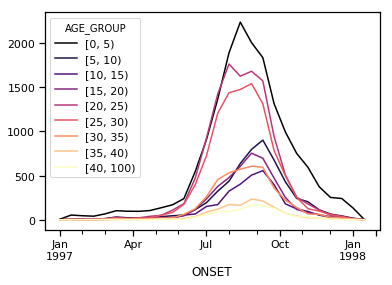

In [87]:
case_counts_2w.plot(cmap='magma');

## Pipes

The one shortcoming of method chaining is that it requires all of the functionality that you need for data processing to be implemented somewhere as methods. Occasionally, we need to do custom manipulations on our data, which can be either awkward or impossible using DataFrame methods alone.

The pandas `pipe` DataFrame method allows users to apply a function to a DataFrame, as if it were a method. The lone restriction on the function is that it must return the modified DataFrame as its return value.

For example, let's say we wanted, rather than counts of measles cases from the dataset above, **proportions** of cases in each period. For this, we need a function that sums the total cases for each period, and then divides each row by that total. Here is such a function:

In [88]:
def to_proportions(df, axis=1):
    row_totals = df.sum(axis)
    return df.div(row_totals, True - axis)

We can then use the `pipe` method in our chain, with the function as its argument:

In [89]:
case_prop_2w = (measles.assign(AGE_GROUP=pd.cut(measles.YEAR_AGE, [0,5,10,15,20,25,30,35,40,100], right=False))
                        .groupby(['ONSET', 'AGE_GROUP'])
                        .size()
                        .unstack()
                        .fillna(0)
                        .resample('2W')
                        .sum()
                        .pipe(to_proportions))

case_prop_2w

AGE_GROUP,"[0, 5)","[5, 10)","[10, 15)","[15, 20)","[20, 25)","[25, 30)","[30, 35)","[35, 40)","[40, 100)"
ONSET,,,,,,,,,
1997-01-05,0.636364,0.181818,0.090909,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000
1997-01-19,0.642857,0.095238,0.011905,0.047619,0.047619,0.095238,0.047619,0.011905,0.000000
1997-02-02,0.647887,0.112676,0.042254,0.042254,0.042254,0.070423,0.014085,0.000000,0.028169
1997-02-16,0.594203,0.043478,0.043478,0.043478,0.130435,0.072464,0.043478,0.000000,0.028986
1997-03-02,0.549180,0.114754,0.032787,0.065574,0.090164,0.065574,0.049180,0.008197,0.024590
1997-03-16,0.447826,0.139130,0.039130,0.091304,0.121739,0.086957,0.047826,0.008696,0.017391
1997-03-30,0.510526,0.121053,0.068421,0.078947,0.078947,0.073684,0.031579,0.015789,0.021053
1997-04-13,0.487310,0.116751,0.055838,0.060914,0.111675,0.096447,0.040609,0.020305,0.010152
1997-04-27,0.423387,0.096774,0.072581,0.076613,0.161290,0.092742,0.048387,0.016129,0.012097


If there are secondary arguments to the function, they can be passed after the function name.

Note that this transformation results in a very different plot that tells a different story!

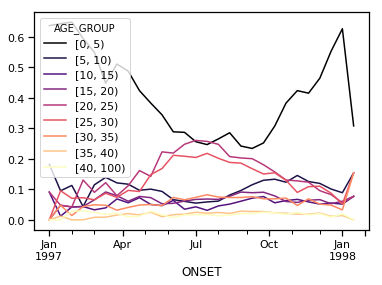

In [90]:
case_prop_2w.plot(cmap='magma');

## Data transformation

There are a slew of additional operations for DataFrames that we would collectively refer to as "transformations" which include tasks such as removing duplicate values, replacing values, and grouping values.

### Dealing with duplicates

We can easily identify and remove duplicate values from `DataFrame` objects. For example, say we want to removed ships from our `vessels` dataset that have the same name:

In [91]:
vessels.duplicated(subset='names')

mmsi
1            False
9            False
21           False
74           False
103          False
310          False
3011         False
4731         False
15151        False
46809        False
80404        False
82003        False
298716       False
366235       False
439541       False
453556       False
505843       False
527918       False
565026       False
572329       False
587370       False
641114       False
642262       False
693559       False
883085        True
1193046      False
1193946      False
1233916      False
1239468      False
3041300      False
             ...  
720728000     True
720754000    False
720768000    False
725004700    False
725005560    False
725005570    False
725011300     True
725018300    False
725019006     True
725021000    False
725022000    False
730000161    False
730010001    False
730026000    False
730031000    False
735057548    False
735059037    False
760101000    False
770576100    False
812719000    False
857632392    False
8669468

In [92]:
vessels.drop_duplicates(['names'])

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type
mmsi,,,,,,,,,,
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing
9,3,000000009/Raven/Shearwater,N,Unknown,Unknown,2,50.0/62.0,62.0,2,Pleasure/Tug
21,1,Us Gov Vessel,Y,Unknown,Unknown,1,208.0,208.0,1,Unknown
74,2,Mcfaul/Sarah Bell,N,Unknown,Unknown,1,155.0,155.0,1,Unknown
103,3,Ron G/Us Navy Warship 103/Us Warship 103,Y,Unknown,Unknown,2,26.0/155.0,155.0,2,Tanker/Unknown
310,1,Arabella,N,Bermuda,Foreign,1,47.0,47.0,1,Unknown
3011,1,Charleston,N,Anguilla,Foreign,1,160.0,160.0,1,Other
4731,1,000004731,N,Yemen (Republic of),Foreign,1,30.0,30.0,1,Unknown
15151,2,R L Enterkin/Us Vessel,N,Unknown,Unknown,2,60.0/175.0,175.0,1,Tug


### Value replacement

Frequently, we get data columns that are encoded as strings that we wish to represent numerically for the purposes of including it in a quantitative analysis. For example, consider the treatment variable in the cervical dystonia dataset:

In [93]:
cdystonia.treat.value_counts()

10000U     213
5000U      211
Placebo    207
Name: treat, dtype: int64

A logical way to specify these numerically is to change them to integer values, perhaps using "Placebo" as a baseline value. If we create a dict with the original values as keys and the replacements as values, we can pass it to the `map` method to implement the changes.

In [94]:
treatment_map = {'Placebo': 0, '5000U': 1, '10000U': 2}

In [95]:
cdystonia['treatment'] = cdystonia.treat.map(treatment_map)
cdystonia.treatment

0      1
1      1
2      1
3      1
4      1
5      1
6      2
7      2
8      2
9      2
10     2
11     2
12     1
13     1
14     1
15     1
16     1
17     1
18     0
19     0
20     0
21     0
22     2
23     2
24     2
25     2
26     2
27     2
28     2
29     2
      ..
601    2
602    2
603    2
604    0
605    0
606    0
607    0
608    0
609    0
610    1
611    1
612    1
613    1
614    1
615    1
616    2
617    2
618    2
619    2
620    2
621    2
622    2
623    2
624    2
625    2
626    1
627    1
628    1
629    1
630    1
Name: treatment, Length: 631, dtype: int64

Alternately, if we simply want to replace particular values in a `Series` or `DataFrame`, we can use the `replace` method. 

An example where replacement is useful is dealing with zeros in certain transformations. For example, if we try to take the log of a set of values:

In [96]:
vals = pd.Series([float(i)**10 for i in range(10)])
vals

0    0.000000e+00
1    1.000000e+00
2    1.024000e+03
3    5.904900e+04
4    1.048576e+06
5    9.765625e+06
6    6.046618e+07
7    2.824752e+08
8    1.073742e+09
9    3.486784e+09
dtype: float64

In [97]:
np.log(vals)

/home/fonnesbeck/anaconda3/envs/dev/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


0         -inf
1     0.000000
2     6.931472
3    10.986123
4    13.862944
5    16.094379
6    17.917595
7    19.459101
8    20.794415
9    21.972246
dtype: float64

In such situations, we can replace the zero with a value so small that it makes no difference to the ensuing analysis. We can do this with `replace`.

In [98]:
vals = vals.replace(0, 1e-6)
np.log(vals)

0   -13.815511
1     0.000000
2     6.931472
3    10.986123
4    13.862944
5    16.094379
6    17.917595
7    19.459101
8    20.794415
9    21.972246
dtype: float64

We can also perform the same replacement that we used `map` for with `replace`:

In [99]:
cdystonia2.treat.replace({'Placebo': 0, '5000U': 1, '10000U': 2})

patient  obs
1        1      1
         2      1
         3      1
         4      1
         5      1
         6      1
2        1      2
         2      2
         3      2
         4      2
         5      2
         6      2
3        1      1
         2      1
         3      1
         4      1
         5      1
         6      1
4        1      0
         2      0
         3      0
         4      0
5        1      2
         2      2
         3      2
         4      2
         5      2
         6      2
6        1      2
         2      2
               ..
104      3      2
         5      2
         6      2
105      1      0
         2      0
         3      0
         4      0
         5      0
         6      0
106      1      1
         2      1
         3      1
         4      1
         5      1
         6      1
107      1      2
         3      2
         4      2
         6      2
108      1      2
         2      2
         3      2
         4      2
         5     

### Inidcator variables

For some statistical analyses (*e.g.* regression models or analyses of variance), categorical or group variables need to be converted into columns of indicators--zeros and ones--to create a so-called **design matrix**. The Pandas function `get_dummies` (indicator variables are also known as *dummy variables*) makes this transformation straightforward.

Let's consider the DataFrame containing the ships corresponding to the transit segments on the eastern seaboard. The `type` variable denotes the class of vessel; we can create a matrix of indicators for this. For simplicity, lets filter out the 5 most common types of ships:


In [100]:
top5 = vessels.type.isin(vessels.type.value_counts().index[:5])
top5.head(10)

mmsi
1        False
9        False
21       False
74       False
103      False
310      False
3011     False
4731     False
15151     True
46809    False
Name: type, dtype: bool

In [101]:
vessels5 = vessels[top5]

In [102]:
pd.get_dummies(vessels5.type).head(10)

,Cargo,Pleasure,Sailing,Tanker,Tug
mmsi,,,,,
15151,0,0,0,0,1
80404,0,1,0,0,0
366235,1,0,0,0,0
587370,0,0,0,0,1
693559,0,0,0,0,1
1233916,0,1,0,0,0
3041300,1,0,0,0,0
3663760,1,0,0,0,0
3688360,1,0,0,0,0


## Categorical Data

Pandas provides a convenient `dtype` for reprsenting categorical (factor) data, called `category`. 

For example, the `treat` column in the cervical dystonia dataset represents three treatment levels in a clinical trial, and is imported by default as an `object` type, since it is a mixture of string characters.

In [103]:
cdystonia.treat.head()

0    5000U
1    5000U
2    5000U
3    5000U
4    5000U
Name: treat, dtype: object

We can convert this to a `category` type either by the `Categorical` constructor, or casting the column using `astype`:

In [104]:
pd.Categorical(cdystonia.treat)

[5000U, 5000U, 5000U, 5000U, 5000U, ..., 5000U, 5000U, 5000U, 5000U, 5000U]
Length: 631
Categories (3, object): [10000U, 5000U, Placebo]

In [105]:
cdystonia['treat'] = cdystonia.treat.astype('category')

In [106]:
cdystonia.treat.describe()

count        631
unique         3
top       10000U
freq         213
Name: treat, dtype: object

By default the Categorical type represents an unordered categorical.

In [107]:
cdystonia.treat.cat.categories

Index(['10000U', '5000U', 'Placebo'], dtype='object')

However, an ordering can be imposed. The order is lexical by default, but will assume the order of the listed categories to be the desired order.

In [108]:
cdystonia.treat.cat.categories = ['Placebo', '5000U', '10000U']

In [109]:
cdystonia.treat.cat.as_ordered().head()

0    5000U
1    5000U
2    5000U
3    5000U
4    5000U
Name: treat, dtype: category
Categories (3, object): [Placebo < 5000U < 10000U]

The important difference between the `category` type and the `object` type is that `category` is represented by an underlying array of integers, which is then mapped to character labels.

In [110]:
cdystonia.treat.cat.codes

0      1
1      1
2      1
3      1
4      1
5      1
6      0
7      0
8      0
9      0
10     0
11     0
12     1
13     1
14     1
15     1
16     1
17     1
18     2
19     2
20     2
21     2
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
601    0
602    0
603    0
604    2
605    2
606    2
607    2
608    2
609    2
610    1
611    1
612    1
613    1
614    1
615    1
616    0
617    0
618    0
619    0
620    0
621    0
622    0
623    0
624    0
625    0
626    1
627    1
628    1
629    1
630    1
Length: 631, dtype: int8

Notice that these are 8-bit integers, which are essentially single bytes of data, making memory usage lower.

There is also a performance benefit. Consider an operation such as calculating the total segment lengths for each ship in the `segments` table (this is also a preview of pandas' `groupby` operation!):

In [111]:
%time segments.groupby(segments.name).seg_length.sum().sort_values(ascending=False, inplace=False).head()

CPU times: user 89.2 ms, sys: 4.42 ms, total: 93.7 ms
Wall time: 86.8 ms


name
Georgia             93941.2
P/b Phantom         39102.4
Padre Island        36969.0
Dodge Island        33736.9
Terrapin  Island    32845.6
Name: seg_length, dtype: float64

In [112]:
segments['name'] = segments.name.astype('category')

In [113]:
%time segments.groupby(segments.name).seg_length.sum().sort_values(ascending=False, inplace=False).head()

CPU times: user 17.7 ms, sys: 8 µs, total: 17.7 ms
Wall time: 16.2 ms


name
Georgia             93941.2
P/b Phantom         39102.4
Padre Island        36969.0
Dodge Island        33736.9
Terrapin  Island    32845.6
Name: seg_length, dtype: float64

Hence, we get a considerable speedup simply by using the appropriate `dtype` for our data.

### Permutation and sampling

For some data analysis tasks, such as simulation, we need to be able to randomly reorder our data, or draw random values from it. Calling NumPy's `permutation` function with the length of the sequence you want to permute generates an array with a permuted sequence of integers, which can be used to re-order the sequence.

In [114]:
new_order = np.random.permutation(len(segments))
new_order[:30]

array([259349,  79356, 125683,  46719, 145724, 169919,  65778, 161156,
       134492,   8043,  59175, 111626, 106461, 198177, 253978,  52656,
       178479,   1511, 251056, 144484, 241321, 161356,  47326, 183120,
        83411,  53618,   5514,  23096, 155353,  84717])

Using this sequence as an argument to the `take` method results in a reordered DataFrame:

In [115]:
segments.take(new_order).head()

,mmsi,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time,type
259349,636091805,Northern Jaguar,17,1,21.4,14.0,8.2,18.5,93.0,2010-09-13 23:12:00,2010-09-14 00:46:00,foo
79356,341809000,Amica,12,1,23.1,12.7,2.2,20.6,96.1,2010-07-26 16:32:00,2010-07-27 00:57:00,foo
125683,366920940,Tarpon,233,1,21.4,8.6,4.1,10.1,2.8,2011-03-17 18:36:00,2011-03-17 21:05:00,foo
46719,265870000,Transfighter,61,1,90.3,9.5,2.6,10.1,1.5,2012-06-15 22:05:00,2012-06-16 07:27:00,foo
145724,367063030,Emerald Princess Ii,1152,1,10.6,4.1,0.0,11.6,27.5,2011-08-03 23:44:00,2011-08-04 03:27:00,foo


Compare this ordering with the original:

In [116]:
segments.head()

,mmsi,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time,type
0,1,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2009-02-10 16:03:00,2009-02-10 16:27:00,foo
1,1,Dredge Capt Frank,1,1,13.5,18.6,10.4,20.6,100.0,2009-04-06 14:31:00,2009-04-06 15:20:00,foo
2,1,Us Gov Vessel,1,1,4.3,16.2,10.3,20.5,100.0,2009-04-06 14:36:00,2009-04-06 14:55:00,foo
3,1,Us Gov Vessel,2,1,9.2,15.4,14.5,16.1,100.0,2009-04-10 17:58:00,2009-04-10 18:34:00,foo
4,1,Dredge Capt Frank,2,1,9.2,15.4,14.6,16.2,100.0,2009-04-10 17:59:00,2009-04-10 18:35:00,foo


For random sampling, `DataFrame` and `Series` objects have a `sample` method that can be used to draw samples, with or without replacement:

In [117]:
vessels.sample(n=10)

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type
mmsi,,,,,,,,,,
366999307,1,Shuman,N,United States of America,Domestic,1,21.0,21.0,1,Other
311698000,1,Morning Crown,N,Bahamas (Commonwealth of the),Foreign,1,199.0,199.0,1,Cargo
371755000,1,Eternal Diligence,N,Panama (Republic of),Foreign,1,228.0,228.0,1,Tanker
339300310,1,Feroi,N,Jamaica,Foreign,1,189.0,189.0,1,Cargo
310410000,1,Forever Young,N,Bermuda,Foreign,1,20.0,20.0,1,Pleasure
246571000,1,Frisian Spring,N,Netherlands (Kingdom of the),Foreign,1,119.0,119.0,1,Cargo
244178000,1,Maas Trader,N,Netherlands (Kingdom of the),Foreign,2,0.0/139.0,139.0,1,Cargo
412313000,1,De Ping Hai,N,China (People's Republic of),Foreign,1,231.0,231.0,1,Cargo
636013054,1,Bareilly,N,Liberia (Republic of),Foreign,1,243.0,243.0,1,Tanker


In [118]:
vessels.sample(n=10, replace=True)

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type
mmsi,,,,,,,,,,
237827000,1,Triathlon,N,Greece,Foreign,2,274.0/275.0,275.0,1,Tanker
369987000,1,Cgc Tornado,Y,United States of America,Domestic,1,49.0,49.0,1,MilOps
636013114,1,Atrotos,N,Liberia (Republic of),Foreign,1,184.0,184.0,1,Tanker
366939080,1,Shelby,N,United States of America,Domestic,1,22.0,22.0,2,Towing/Tug
357029000,1,Orange Tiger,N,Panama (Republic of),Foreign,1,225.0,225.0,1,Cargo
477170500,1,Golden Ice,N,Hong Kong (Special Administrative Region of Ch...,Foreign,1,225.0,225.0,1,Cargo
636091135,1,As Caria,N,Liberia (Republic of),Foreign,1,222.0,222.0,1,Cargo
238252000,1,Olib,N,Croatia (Republic of),Foreign,1,247.0,247.0,1,Tanker
351895000,2,Mv Sea Orchid/Sea Orchid,N,Panama (Republic of),Foreign,1,113.0,113.0,1,Cargo


## Data aggregation and GroupBy operations

One of the most powerful features of Pandas is its **GroupBy** functionality. On occasion we may want to perform operations on *groups* of observations within a dataset. For exmaple:

* **aggregation**, such as computing the sum of mean of each group, which involves applying a function to each group and returning the aggregated results
* **slicing** the DataFrame into groups and then doing something with the resulting slices (*e.g.* plotting)
* group-wise **transformation**, such as standardization/normalization

In [119]:
cdystonia_grouped = cdystonia.groupby(cdystonia.patient)

This *grouped* dataset is hard to visualize



In [120]:
cdystonia_grouped

However, the grouping is only an intermediate step; for example, we may want to **iterate** over each of the patient groups:

In [121]:
for patient, group in cdystonia_grouped:
    print('patient', patient)
    print('group', group)

patient 1
group    patient  obs  week  site  id  treat  age sex  twstrs  treatment
0        1    1     0     1   1  5000U   65   F      32          1
1        1    2     2     1   1  5000U   65   F      30          1
2        1    3     4     1   1  5000U   65   F      24          1
3        1    4     8     1   1  5000U   65   F      37          1
4        1    5    12     1   1  5000U   65   F      39          1
5        1    6    16     1   1  5000U   65   F      36          1
patient 2
group     patient  obs  week  site  id    treat  age sex  twstrs  treatment
6         2    1     0     1   2  Placebo   70   F      60          2
7         2    2     2     1   2  Placebo   70   F      26          2
8         2    3     4     1   2  Placebo   70   F      27          2
9         2    4     8     1   2  Placebo   70   F      41          2
10        2    5    12     1   2  Placebo   70   F      65          2
11        2    6    16     1   2  Placebo   70   F      67          2
patient 3

A common data analysis procedure is the **split-apply-combine** operation, which groups subsets of data together, applies a function to each of the groups, then recombines them into a new data table.

For example, we may want to aggregate our data with with some function.

![split-apply-combine](http://f.cl.ly/items/0s0Z252j0X0c3k3P1M47/Screen%20Shot%202013-06-02%20at%203.04.04%20PM.png)

<div align="right">*(figure taken from "Python for Data Analysis", p.251)*</div>

We can aggregate in Pandas using the `aggregate` (or `agg`, for short) method:

In [122]:
cdystonia_grouped.agg(np.mean).head()

,patient,obs,week,site,id,age,twstrs,treatment
patient,,,,,,,,
1,1.0,3.5,7.0,1.0,1.0,65.0,33.000000,1.0
2,2.0,3.5,7.0,1.0,2.0,70.0,47.666667,2.0
3,3.0,3.5,7.0,1.0,3.0,64.0,30.500000,1.0
4,4.0,2.5,3.5,1.0,4.0,59.0,60.000000,0.0
5,5.0,3.5,7.0,1.0,5.0,76.0,46.166667,2.0


Notice that the `treat` and `sex` variables are not included in the aggregation. Since it does not make sense to aggregate non-string variables, these columns are simply ignored by the method.

Some aggregation functions are so common that Pandas has a convenience method for them, such as `mean`:

In [123]:
cdystonia_grouped.mean().head()

,patient,obs,week,site,id,age,twstrs,treatment
patient,,,,,,,,
1,1.0,3.5,7.0,1.0,1.0,65.0,33.000000,1.0
2,2.0,3.5,7.0,1.0,2.0,70.0,47.666667,2.0
3,3.0,3.5,7.0,1.0,3.0,64.0,30.500000,1.0
4,4.0,2.5,3.5,1.0,4.0,59.0,60.000000,0.0
5,5.0,3.5,7.0,1.0,5.0,76.0,46.166667,2.0


The `add_prefix` and `add_suffix` methods can be used to give the columns of the resulting table labels that reflect the transformation:

In [124]:
cdystonia_grouped.mean().add_suffix('_mean').head()

,patient_mean,obs_mean,week_mean,site_mean,id_mean,age_mean,twstrs_mean,treatment_mean
patient,,,,,,,,
1,1.0,3.5,7.0,1.0,1.0,65.0,33.000000,1.0
2,2.0,3.5,7.0,1.0,2.0,70.0,47.666667,2.0
3,3.0,3.5,7.0,1.0,3.0,64.0,30.500000,1.0
4,4.0,2.5,3.5,1.0,4.0,59.0,60.000000,0.0
5,5.0,3.5,7.0,1.0,5.0,76.0,46.166667,2.0


In [125]:
# The median of the `twstrs` variable
cdystonia_grouped['twstrs'].quantile(0.5)

patient
1      34.0
2      50.5
3      30.5
4      61.5
5      48.5
6      48.0
7      42.0
8      32.5
9      35.5
10     20.5
11     44.5
12     26.0
13     45.5
14     47.5
15     51.5
16     56.5
17     63.0
18     53.5
19     42.0
20     53.5
21     64.0
22     41.0
23     58.0
24     52.5
25     31.0
26     47.0
27     49.5
28     24.5
29     38.0
30     32.0
       ... 
80     25.0
81     44.0
82     29.0
83     19.5
84     32.5
85     37.0
86     24.5
87     38.5
88     25.5
89     44.5
90     49.0
91     53.0
92     26.5
93     34.0
94     37.0
95     16.0
96     35.0
97     46.0
98     33.5
99     29.0
100    61.0
101    32.5
102    51.5
103    45.0
104    46.0
105    45.5
106    67.5
107    44.0
108    50.5
109    38.0
Name: twstrs, Length: 109, dtype: float64

If we wish, we can easily aggregate according to multiple keys:

In [126]:
cdystonia.groupby(['week','site']).mean().head()

patient  obs   id        age     twstrs  treatment
week site                                                    
0    1         6.5  1.0  6.5  59.000000  43.083333   1.000000
     2        19.5  1.0  7.5  53.928571  51.857143   0.928571
     3        32.5  1.0  6.5  51.500000  38.750000   1.000000
     4        42.5  1.0  4.5  59.250000  48.125000   1.000000
     5        49.5  1.0  3.5  51.833333  49.333333   1.000000

Alternately, we can **transform** the data, using a function of our choice with the `transform` method:

In [127]:
normalize = lambda x: (x - x.mean())/x.std()

cdystonia_grouped.transform(normalize).head()

,patient,obs,week,site,id,age,twstrs,treatment
0,NaN,-1.336306,-1.135550,NaN,NaN,NaN,-0.181369,NaN
1,NaN,-0.801784,-0.811107,NaN,NaN,NaN,-0.544107,NaN
2,NaN,-0.267261,-0.486664,NaN,NaN,NaN,-1.632322,NaN
3,NaN,0.267261,0.162221,NaN,NaN,NaN,0.725476,NaN
4,NaN,0.801784,0.811107,NaN,NaN,NaN,1.088214,NaN


It is easy to do column selection within `groupby` operations, if we are only interested split-apply-combine operations on a subset of columns:

In [128]:
cdystonia_grouped['twstrs'].mean().head()

patient
1    33.000000
2    47.666667
3    30.500000
4    60.000000
5    46.166667
Name: twstrs, dtype: float64

In [129]:
# This gives the same result as a DataFrame
cdystonia_grouped[['twstrs']].mean().head()

,twstrs
patient,
1,33.000000
2,47.666667
3,30.500000
4,60.000000
5,46.166667


If you simply want to divide your DataFrame into chunks for later use, its easy to convert them into a dict so that they can be easily indexed out as needed:

In [130]:
chunks = dict(list(cdystonia_grouped))

In [131]:
chunks[4]

,patient,obs,week,site,id,treat,age,sex,twstrs,treatment
18,4,1,0,1,4,10000U,59,F,53,0
19,4,2,2,1,4,10000U,59,F,61,0
20,4,3,4,1,4,10000U,59,F,64,0
21,4,4,8,1,4,10000U,59,F,62,0


Its also possible to group by one or more levels of a hierarchical index. Recall `cdystonia2`, which we created with a hierarchical index:

In [132]:
cdystonia2.head(10)

week  site  id   treat  age sex  twstrs
patient obs                                         
1       1       0     1   1   5000U   65   F      32
        2       2     1   1   5000U   65   F      30
        3       4     1   1   5000U   65   F      24
        4       8     1   1   5000U   65   F      37
        5      12     1   1   5000U   65   F      39
        6      16     1   1   5000U   65   F      36
2       1       0     1   2  10000U   70   F      60
        2       2     1   2  10000U   70   F      26
        3       4     1   2  10000U   70   F      27
        4       8     1   2  10000U   70   F      41

In [133]:
cdystonia2.groupby(level='obs', axis=0)['twstrs'].mean()

obs
1    45.651376
2    37.611650
3    37.066038
4    39.807692
5    42.913462
6    45.628571
Name: twstrs, dtype: float64

### Apply

We can generalize the split-apply-combine methodology by using `apply` function. This allows us to invoke any function we wish on a grouped dataset and recombine them into a DataFrame.

The function below takes a DataFrame and a column name, sorts by the column, and takes the `n` largest values of that column. We can use this with `apply` to return the largest values from every group in a DataFrame in a single call. 

In [134]:
def top(df, column, n=5):
    return df.sort_values(by=column, ascending=False)[:n]

To see this in action, consider the vessel transit segments dataset (which we merged with the vessel information to yield `segments_merged`). Say we wanted to return the 3 longest segments travelled by each ship:

In [135]:
top3segments = segments_merged.groupby('mmsi').apply(top, column='seg_length', n=3)[['names', 'seg_length']]
top3segments.head(15)

names  seg_length
mmsi                                                                  
1    6   Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...        76.0
     5   Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...        17.4
     7   Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...        13.7
9    15                         000000009/Raven/Shearwater        47.2
     14                         000000009/Raven/Shearwater        31.4
     13                         000000009/Raven/Shearwater        19.3
21   16                                      Us Gov Vessel        48.7
     25                                      Us Gov Vessel        25.3
     30                                      Us Gov Vessel        21.7
74   35                                  Mcfaul/Sarah Bell         7.4
     34                                  Mcfaul/Sarah Bell         1.4
103  37           Ron G/Us Navy Warship 103/Us Warship 103        87.5
     41           Ron G/Us Navy Warship 103/Us Warship 103        62.6
     43           Ron G/Us Navy Warship 103/Us Warship 103        59.1
310  51                                           Arabella        77.4

Notice that additional arguments for the applied function can be passed via `apply` after the function name. It assumes that the DataFrame is the first argument.

Recall the microbiome data sets that we used previously for the concatenation example. Suppose that we wish to aggregate the data at a higher biological classification than genus. For example, we can identify samples down to *class*, which is the 3rd level of organization in each index.

In [136]:
mb1.index[:3]

Index(['Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera',
       'Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus',
       'Archaea "Crenarchaeota" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus'],
      dtype='object', name='Taxon')

Using the string methods `split` and `join` we can create an index that just uses the first three classifications: domain, phylum and class.

In [137]:
class_index = mb1.index.map(lambda x: ' '.join(x.split(' ')[:3]))

In [138]:
mb_class = mb1.copy()
mb_class.index = class_index

However, since there are multiple taxonomic units with the same class, our index is no longer unique:

In [139]:
mb_class.head()

,Count
Taxon,
"Archaea ""Crenarchaeota"" Thermoprotei",7
"Archaea ""Crenarchaeota"" Thermoprotei",2
"Archaea ""Crenarchaeota"" Thermoprotei",3
"Archaea ""Crenarchaeota"" Thermoprotei",3
"Archaea ""Euryarchaeota"" ""Methanomicrobia""",7


We can re-establish a unique index by summing all rows with the same class, using `groupby`:

In [140]:
mb_class.groupby(level=0).sum().head(10)

,Count
Taxon,
"Archaea ""Crenarchaeota"" Thermoprotei",15
"Archaea ""Euryarchaeota"" ""Methanomicrobia""",9
"Archaea ""Euryarchaeota"" Archaeoglobi",2
"Archaea ""Euryarchaeota"" Halobacteria",12
"Archaea ""Euryarchaeota"" Methanococci",1
"Archaea ""Euryarchaeota"" Methanopyri",12
"Archaea ""Euryarchaeota"" Thermoplasmata",2
"Bacteria ""Actinobacteria"" Actinobacteria",1740
"Bacteria ""Aquificae"" Aquificae",11


## Exercise

Load the dataset in `titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [141]:
from IPython.core.display import HTML
HTML(filename='../data/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


Women and children first?

1. Use the `groupby` method to calculate the proportion of passengers that survived by sex.
2. Calculate the same proportion, but by class and sex.
3. Create age categories: children (under 14 years), adolescents (14-20), adult (21-64), and senior(65+), and calculate survival proportions by age category, class and sex.

In [142]:
# Write your answer here

---
## References

[Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do) Wes McKinney